In [1]:
import pyam
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.colors
sns.set_theme(style="whitegrid")

In [2]:
ar6_meta_path = '../../../data/TOD/model_results/raw/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx'
results_path = '../../../data/TOD/model_results/to_share/model_results_to_share_Outlooks.xlsx'

In [3]:
ar6_meta = pd.read_excel(ar6_meta_path, sheet_name='meta_Ch3vetted_withclimate')
ar6_c1_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Limit to 1.5C (>50%) no or low OS immediate 2020 action']['Scenario'].unique()
# ar6_c1_scenarios = ar6_meta[ar6_meta['Category_subset'] == 'C1a_NZGHGs']['Scenario'].unique()
ar6_c78_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Trend from implemented policies']['Scenario'].unique()

# GDP

In [4]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
              'Food Demand', 
              'Final Energy', 
              'Primary Energy',
              'Food Demand|Crops',
              'Food Demand|Livestock',
              'Forcing',
              'Yield|Cereal',
            #   'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|10.0th Percentile',
              # 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|95.0th Percentile',
              # 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|10.0th Percentile',
            #   'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile',
              # 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile',
              'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile',        
              ],
    region='World',
    scenario=list(ar6_c78_scenarios),
)

df_ar6.rename(variable={'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|95.0th Percentile':
                        'Temperature|Global Mean',
                        'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile':
                        'Temperature|Global Mean',
                        'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile':
                        'Temperature|Global Mean',
                        'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile':
                        'Temperature|Global Mean', 
                        'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|10.0th Percentile':
                        'Temperature|Global Mean',
                        }, inplace=True)


df_geo = pd.read_excel(results_path)
df_geo.rename(columns={'topic':'model'}, inplace=True)
df_geo = pyam.IamDataFrame(df_geo)
# df_geo.rename(unit={'?C':'°C'}, inplace=True)
df_geo = df_geo.filter(year=[
        2020,
        2025,
        2030,
        2035,
        2040,
        2045,
        2050,
        ],
        region='World',
        scenario='REF',)

df_lines_geo = df_geo.filter(
    variable=[
        'GDP|PPP', 
              'Population', 
              'Food Demand', 
              'Final Energy', 
              'Primary Energy',
              'Food Demand|Crops',
              'Food Demand|Livestock',
              'Forcing',
              'Temperature|Global Mean',
              'Yield|Cereal',
              ],
)


df_ar6.validate(
    variable='Food Demand*', year=2020, upper_bound=5000, exclude_on_fail=True
)

df_ar6 = df_ar6.filter(year=[
        2020,
        2025,
        2030,
        2035,
        2040,
        2045,
        2050,
    ],
    exclude=False)


[INFO] 09:08:59 - ixmp4.conf.settings: Connecting as user 'stephenmaycock'.
[INFO] 09:09:00 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:09:00 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 09:09:13 - pyam.validation: 6 of 8710 data points do not satisfy the criteria
[INFO] 09:09:13 - pyam.validation: 2 scenarios failed validation and will be set as `exclude=True`.


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


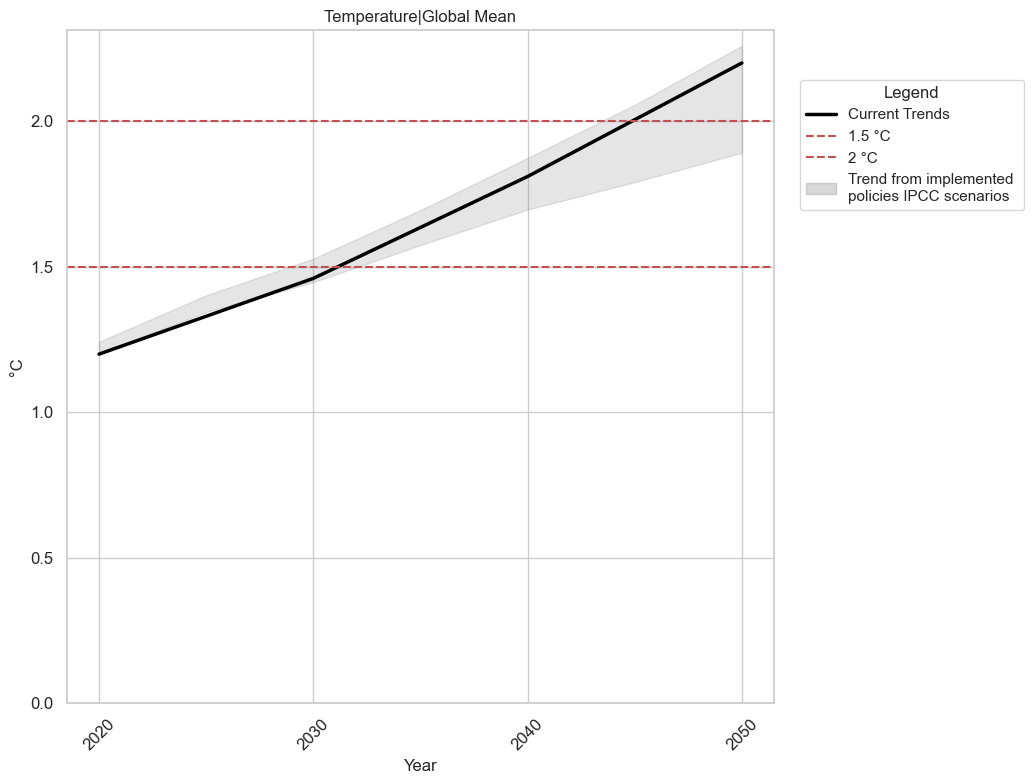

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


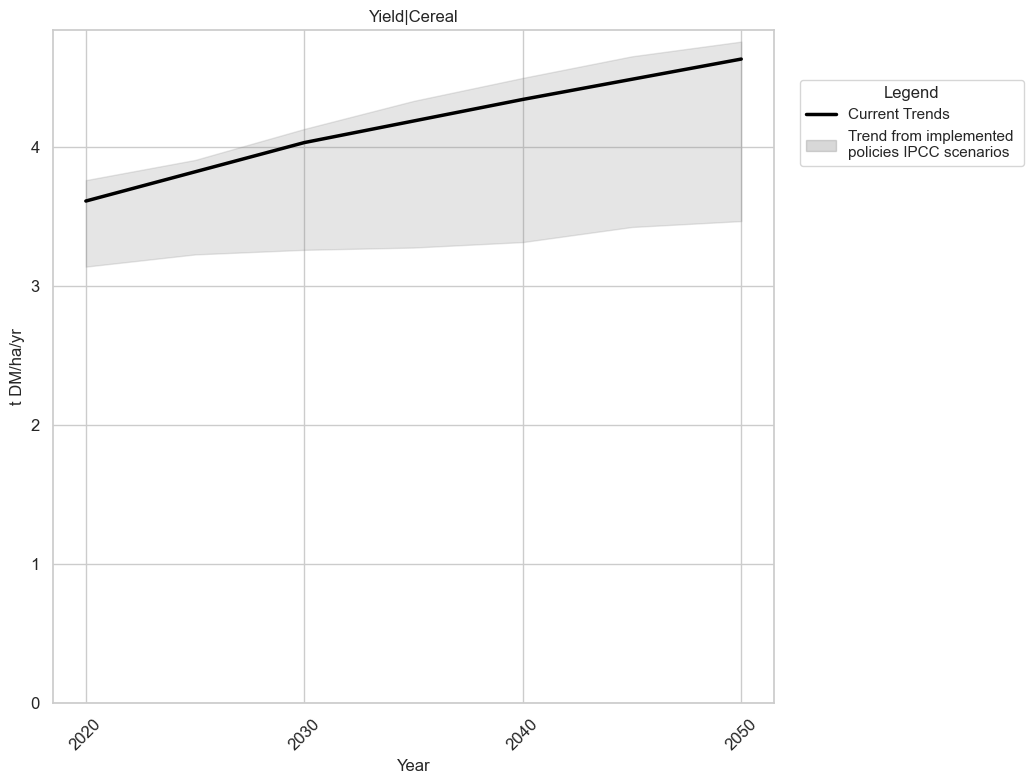

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\715570904.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


In [5]:
df_geo_data = df_lines_geo.data
df_ar6_data = df_ar6.data
variables = df_geo_data.variable.unique()
# variables = ["Agricultural Demand"]
for variable in variables:
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        color="black",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax,
        label='Current Trends'
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey',
        errorbar=(lambda x: (x.min(), x.max()))
    )

    if variable == 'Temperature|Global Mean':
        # specifying horizontal line type 
        ax.axhline(y = 1.5, color = 'r', linestyle = '--', label='1.5 °C')
        ax.axhline(y = 2, color = 'r', linestyle = '--', label='2 °C')  

    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2020, 2030, 2040, 2050,], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['Trend from implemented \npolicies IPCC scenarios']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.3, 0.9)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    if variable_name in ['Yield_Cereal','Temperature_Global_Mean']: 
        # plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
        # plt.savefig(f"../../../plots/SOD/chpt_11/report/{variable_name}.png", bbox_inches="tight")
        # plt.savefig(f"../../../plots/SOD/chpt_11/report/{variable_name}.svg", bbox_inches="tight")
        plt.show()
    else:
        plt.savefig(f"../../../plots/TOD/chpt_11/diagnostic/{variable_name}.png", bbox_inches="tight")
        plt.close()
    

# GDP and Pop in one panel

In [6]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
            ],
    region='World',
    scenario=list(ar6_c78_scenarios)
)

# df_geo = pyam.read_iiasa(
#     'geo7_internal',
#     variable=['GDP|PPP', 
#               'Population', 
#               ],
#     region='World',
#     scenario='REF',
#     # model='IFs*',
# )
df_message = pyam.read_iiasa(
    'ar6-public',
    variable=['GDP|PPP', 
              'Population', 
            ],
    region='World',
    scenario=[
              'SSP2-Baseline', 
              ],
    model='MESSAGE-GLOBIOM 1.0',
)

df_message.rename({'scenario':{'SSP2-Baseline': 'Current Trend', 'REF-v2': 'Current Trend'}}, inplace=True)


df_urban = pyam.IamDataFrame('../../../data/TOD/model_results/raw/Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx')
df_urban = df_urban.filter(variable=['GDP|PPP', 'Population','Population|Urban'], region='World', scenario='REF-v2')
df_urban_share = df_urban.divide('Population|Urban', ['Population'], 'Population|Urban (Share)')
df_urban_share.rename({'scenario':{'REF-v2': 'Current Trend'}, 'model':{'IMAGE 3.3':'Macro_Economy'}}, inplace=True)
df_urban_share = df_urban_share.filter(year=[2020,
                                    2025,
                                    2030,
                                    2035,
                                    2040,
                                    2045,
                                    2050])
print(df_urban_share)

# df_message = pyam.concat([df_message, df_urban_share])
# df_message.multiply('Population', 'Population|Urban (Share)', 'Population|Urban', append=True)
# df_message.divide('GDP|PPP', 'Population', 'GDP|PPP|Per Capita', ignore_units='thousand US$2010/yr', append=True)
df_ar6.divide('GDP|PPP', 'Population', 'GDP|PPP|Per Capita', ignore_units='thousand US$2010/yr', append=True)
# df_message.timeseries()

df_population = df_geo.filter(variable=['Population','GDP|PPP'])
print(df_population)
df_population.rename({'scenario':{'REF': 'Current Trend'}}, inplace=True)
df_population = pyam.concat([df_population, df_urban_share])
df_population.multiply('Population', 'Population|Urban (Share)', 'Population|Urban', ignore_units='million', append=True)
print(df_population, "test")
df_population.divide('GDP|PPP', 'Population', 'GDP|PPP|Per Capita', ignore_units='thousand US$2010/yr', append=True)
df_population.timeseries()


[INFO] 09:09:19 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:09:19 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 09:09:30 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:09:30 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 09:09:36 - pyam.core: Reading file ..\..\..\data\TOD\model_results\raw\Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Macro_Economy (1)
 * scenario : Current Trend (1)
Timeseries data coordinates:
   region   : World (1)
   variable : Population|Urban (Share) (1)
   unit     : '' (1)
   year     : 2020, 2025, 2030, 2035, 2040, 2045, 2050 (7)
<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Macro_Economy (1)
 * scenario : REF (1)
Timeseries data coordinates:
   region   : World (1)
   variable : GDP|PPP, Population (2)
   unit     : billion USD_2010/yr, million (2)
   year     : 2020, 2030, 2040, 2050 (4)
<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Macro_Economy (1)
 * scenario : Current Trend (1)
Timeseries data coordinates:
   region   : World (1)
   variable : GDP|PPP, Population, Population|Urban, Population|Urban (Share) (4)
   unit     : '', billion USD_2010/yr, million (3)
   year     : 2020, 2025, 2030, 2035, 2040, 2045, 2050 (7) test


2020  \
model         scenario      region variable                 unit                                 
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr  102000.000000   
                                   GDP|PPP|Per Capita       thousand US$2010/yr      13.144330   
                                   Population               million                7760.000000   
                                   Population|Urban         million                4289.694799   
                                   Population|Urban (Share)                           0.552796   

                                                                                     2025  \
model         scenario      region variable                 unit                            
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr       NaN   
                                   GDP|PPP|Per Capita       thousand US$2010/yr       NaN   
                                   Population               million                   NaN   
                                   Population|Urban         million                   NaN   
                                   Population|Urban (Share)                      0.574339   

                                                                                          2030  \
model         scenario      region variable                 unit                                 
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr  146000.000000   
                                   GDP|PPP|Per Capita       thousand US$2010/yr      17.339667   
                                   Population               million                8420.000000   
                                   Population|Urban         million                5019.221918   
                                   Population|Urban (Share)                           0.596107   

                                                                                     2035  \
model         scenario      region variable                 unit                            
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr       NaN   
                                   GDP|PPP|Per Capita       thousand US$2010/yr       NaN   
                                   Population               million                   NaN   
                                   Population|Urban         million                   NaN   
                                   Population|Urban (Share)                      0.615367   

                                                                                          2040  \
model         scenario      region variable                 unit                                 
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr  191000.000000   
                                   GDP|PPP|Per Capita       thousand US$2010/yr      21.316964   
                                   Population               million                8960.000000   
                                   Population|Urban         million                5688.147863   
                                   Population|Urban (Share)                           0.634838   

                                                                                     2045  \
model         scenario      region variable                 unit                            
Macro_Economy Current Trend World  GDP|PPP                  billion USD_2010/yr       NaN   
                                   GDP|PPP|Per Capita       thousand US$2010/yr       NaN   
                                   Population               million                   NaN   
                                   Population|Urban         million                   NaN   
                                   Population|Urban (Share)                      0.652049   

                                                                         

In [7]:
df_ar6.validate(
    variable='GDP|PPP', year=2020, upper_bound=111368.950000  * 1.1,  lower_bound=111368.950000 * 0.9, exclude_on_fail=True # 14.632150 
)
df_ar6_in_range = df_ar6.filter(exclude=False)
df_ar6_in_range.filter(variable='GDP|PPP*').to_excel('../../../data/TOD/model_results/scenarios_gdp_in_range.xlsx')
df_ar6.filter(variable='GDP|PPP*', exclude=True).to_excel('../../../data/TOD/model_results/scenarios_gdp_out_of_range.xlsx')

[INFO] 09:09:48 - pyam.validation: 5 of 1920 data points do not satisfy the criteria
[INFO] 09:09:48 - pyam.validation: 5 scenarios failed validation and will be set as `exclude=True`.


In [8]:
# From https://population.un.org/wpp/Download/
df_un_pop = pd.read_excel('../../../data/TOD/UN_PPP2024_Output_PopTot.xlsx', sheet_name='Median', skiprows=16)
df_un_pop = df_un_pop[df_un_pop['Region, subregion, country or area *'] == 'World']
df_un_pop = df_un_pop[[2025, 2030, 2035, 2040, 2045, 2050,]]
df_un_pop[2020] =  7851415
df_un_pop = df_un_pop / 1000
df_un_pop['model'] = 'UN'
df_un_pop['scenario'] = 'UN Median'
df_un_pop['region'] = 'World'
df_un_pop['variable'] = 'Population'
df_un_pop['unit'] = 'million'
df_un_pop = df_un_pop[['model', 'scenario', 'region', 'variable', 'unit', 2020, 2025, 2030, 2035, 2040, 2045, 2050,]]
# df_un_pop.pivot(index=[], values=[2025, 2030, 2035, 2040, 2045, 2050,])\
df_un_pop = pd.melt(df_un_pop, id_vars=['model', 'scenario', 'region', 'variable', 'unit'], var_name='year', value_name='value')
df_un_pop

,model,scenario,region,variable,unit,year,value
0,UN,UN Median,World,Population,million,2020,7851.415
1,UN,UN Median,World,Population,million,2025,8231.61307
2,UN,UN Median,World,Population,million,2030,8569.124911
3,UN,UN Median,World,Population,million,2035,8885.210181
4,UN,UN Median,World,Population,million,2040,9177.190203
5,UN,UN Median,World,Population,million,2045,9439.639668
6,UN,UN Median,World,Population,million,2050,9664.378587


In [9]:
df_message.filter(year=[2020,
                        2030,
                        2040,
                        2050,],variable='GDP|PPP*',).to_excel('../../../data/TOD/model_results/SSP2_baseline_GDP.xlsx')

            model       scenario region                  variable  \
0   Macro_Economy  Current Trend  World                   GDP|PPP   
1   Macro_Economy  Current Trend  World                   GDP|PPP   
2   Macro_Economy  Current Trend  World                   GDP|PPP   
3   Macro_Economy  Current Trend  World                   GDP|PPP   
4   Macro_Economy  Current Trend  World        GDP|PPP|Per Capita   
5   Macro_Economy  Current Trend  World        GDP|PPP|Per Capita   
6   Macro_Economy  Current Trend  World        GDP|PPP|Per Capita   
7   Macro_Economy  Current Trend  World        GDP|PPP|Per Capita   
8   Macro_Economy  Current Trend  World                Population   
9   Macro_Economy  Current Trend  World                Population   
10  Macro_Economy  Current Trend  World                Population   
11  Macro_Economy  Current Trend  World                Population   
12  Macro_Economy  Current Trend  World          Population|Urban   
13  Macro_Economy  Current Trend  

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\4090029725.py:85: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_15084\4090029725.py:97: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


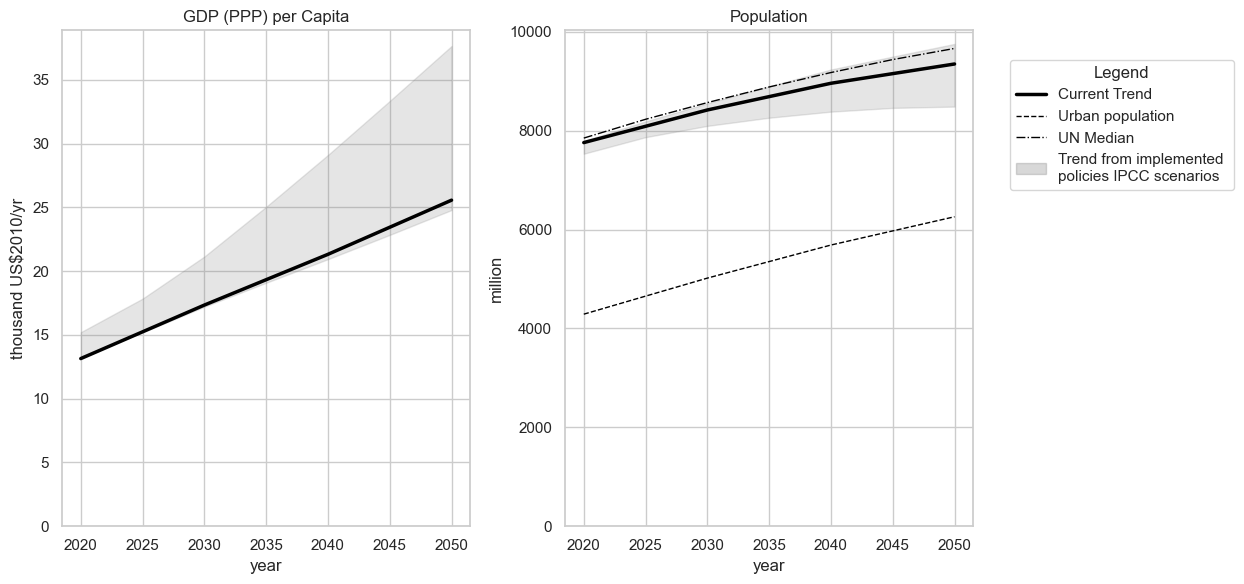

In [10]:
# df_geo_data = df_message.filter(year=[2020,
#                                     2025,
#                                     2030,
#                                     2035,
#                                     2040,
#                                     2045,
#                                     2050,]).data
df_geo_data = df_population.filter(year=[2020,
                                    2025,
                                    2030,
                                    2035,
                                    2040,
                                    2045,
                                    2050,]).data

print(df_geo_data)
df_ar6_data = df_ar6_in_range.filter(year=[2020,
                                    2025,
                                    2030,
                                    2035,
                                    2040,
                                    2045,
                                    2050,]).data


# Use Seaborn to create the plot with markers and lines
geo_data_gdp = df_geo_data[df_geo_data["variable"] == 'GDP|PPP|Per Capita']
ar6_data_gdp = df_ar6_data[df_ar6_data["variable"] == 'GDP|PPP|Per Capita']


# Use Seaborn to create the plot with markers and lines
geo_data_pop = df_geo_data[df_geo_data["variable"] == 'Population']
ar6_data_pop = df_ar6_data[df_ar6_data["variable"] == 'Population']

geo_data_urban = df_geo_data[df_geo_data["variable"] == 'Population|Urban']

# # Define the color palette for scenarios
scenario_colors = {
    "Current Trend": "black",
    "REF-v2": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.lineplot(
    data=geo_data_gdp,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    linewidth=2.5,
    ax=axes[0]
)
sns.lineplot(
    data=ar6_data_gdp,
    x="year",
    y="value",
    linewidth=0,
    ax=axes[0],
    color='grey',
    errorbar=(lambda x: (x.min(), x.max()))
)

sns.lineplot(
    data=geo_data_pop,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    linewidth=2.5,
    ax=axes[1]
)
sns.lineplot(
    data=ar6_data_pop,
    x="year",
    y="value",
    linewidth=0,
    ax=axes[1],
    color='grey',
    errorbar=(lambda x: (x.min(), x.max()))
)

sns.lineplot(
    data=geo_data_urban,
    x="year",
    y="value",
    color="black",
    palette=scenario_colors,
    linewidth=1,
    linestyle='--',
    label='Urban population',
    ax=axes[1]
)

sns.lineplot(
    data=df_un_pop,
    x="year",
    y="value",
    color="black",
    palette=scenario_colors,
    linewidth=1,
    linestyle='-.',
    label='UN Median',
    ax=axes[1]
)


axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
# Set labels and title
# plt.xlabel("Year", fontsize=12)
axes[0].set_ylabel(geo_data_gdp["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
axes[1].set_ylabel(geo_data_pop["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
axes[0].set_ylim(min(0,axes[0].get_ylim()[0]), axes[0].get_ylim()[1])
axes[1].set_ylim(min(0,axes[1].get_ylim()[0]), axes[1].get_ylim()[1])
axes[0].set_title('GDP (PPP) per Capita')  # Set the title to the variable
axes[1].set_title('Population')  # Set the title to the variable

# Manually add Legend
handles, labels = axes[1].get_legend_handles_labels()
legend_patch = mpatches.Patch(color='grey', alpha=0.3)
handles = handles + [legend_patch]
labels = labels + ['Trend from implemented \npolicies IPCC scenarios']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.25, 0.9)) 

# Extract min and max values from AR6 GDP data by year
ar6_gdp_min_max = ar6_data_gdp.groupby('year')['value'].agg(['min', 'max']).reset_index()
ar6_gdp_min_max.rename(columns={'min': 'min_value', 'max': 'max_value'}, inplace=True)

# Extract min and max values from AR6 population data by year
ar6_pop_min_max = ar6_data_pop.groupby('year')['value'].agg(['min', 'max']).reset_index()
ar6_pop_min_max.rename(columns={'min': 'min_value', 'max': 'max_value'}, inplace=True)

# Export the GEO data
geo_data_gdp.to_csv('geo_data_gdp.csv', index=False)
geo_data_pop.to_csv('geo_data_pop.csv', index=False)
geo_data_urban.to_csv('geo_data_urban.csv', index=False)

# Export the UN population data
df_un_pop.to_csv('un_pop_data.csv', index=False)

# Export the AR6 min-max data
ar6_gdp_min_max.to_csv('ar6_gdp_min_max.csv', index=False)
ar6_pop_min_max.to_csv('ar6_pop_min_max.csv', index=False)

# If you want to combine into a single consolidated file for each type
# Create a consolidated GDP file with GEO data and AR6 min-max
geo_gdp_years = geo_data_gdp['year'].unique()
ar6_gdp_min_max_filtered = ar6_gdp_min_max[ar6_gdp_min_max['year'].isin(geo_gdp_years)]

# Create consolidated population file with GEO data and AR6 min-max
geo_pop_years = geo_data_pop['year'].unique()
ar6_pop_min_max_filtered = ar6_pop_min_max[ar6_pop_min_max['year'].isin(geo_pop_years)]

# Export consolidated files
consolidated_gdp = pd.merge(
    geo_data_gdp, 
    ar6_gdp_min_max_filtered,
    on='year',
    how='left'
)
consolidated_gdp.to_csv('consolidated_gdp_with_ar6_ranges.csv', index=False)

consolidated_pop = pd.merge(
    geo_data_pop,
    ar6_pop_min_max_filtered,
    on='year',
    how='left'
)
consolidated_pop.to_csv('consolidated_pop_with_ar6_ranges.csv', index=False)

plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
# TODO: REPORT FIGURE
plt.savefig(f"../../../plots/TOD/chpt_11/report/GPD_and_Pop.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/chpt_11/report/GPD_and_Pop.svg", bbox_inches="tight")
# plt.close()
    

# Energy stacked

In [11]:
df_ar6_energy_c78 = pyam.read_iiasa(
    'ar6-public',
    variable=[
        'Final Energy',
        'Secondary Energy|Electricity', 
        'Primary Energy',
        'Emissions|Kyoto Gases',
        'Food Demand',
        'Agricultural Demand|Crops'],
    region='World',
    scenario=list(ar6_c78_scenarios),
)

# Remove Outliers
df_ar6_energy_c78.validate(
    variable='Food Demand*', year=2020, upper_bound=5000, exclude_on_fail=True
)
df_ar6_energy_c78.validate(
    variable='Agricultural Demand|Crops', year=2020, upper_bound=7000, exclude_on_fail=True
)
df_ar6_energy_c78 = df_ar6_energy_c78.filter(exclude=False)

df_stacked_geo = df_geo.filter(
    variable=[
        'Final Energy*',
        'Secondary Energy|Electricity*',
        'Primary Energy*',
        'Emissions|CO2|AFOLU',
        'Emissions|CO2|Energy',
        'Emissions|CH4',
        'Emissions|N2O',
        'Emissions|F-Gases',
        'Food Demand*',
        'Agricultural Demand|Non-Energy|Crops*',
        'Agricultural Demand|Energy|Crops' 
              ],
    level=1,
)
# Remove variables with % as unit
df_stacked_geo = df_stacked_geo.filter(unit='%', keep=False)

# Agricultural Demand|Crops
df_stacked_geo.aggregate("Agricultural Demand|Crops", 
                    components=['Agricultural Demand|Energy|Crops', 
                                'Agricultural Demand|Non-Energy|Crops',
                                ], 
                        append=True)

df_stacked_geo.convert_unit('Mt CH4/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_stacked_geo.convert_unit('kt N2O/yr', to='Mt CO2e/yr', context='AR6GWP100', inplace=True)
df_stacked_geo.convert_unit('Mt CO2/yr', to='Mt CO2e/yr', inplace=True)

[INFO] 09:09:53 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:09:53 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 09:10:03 - pyam.validation: 2 of 3528 data points do not satisfy the criteria
[INFO] 09:10:03 - pyam.validation: 2 scenarios failed validation and will be set as `exclude=True`.
[INFO] 09:10:03 - pyam.validation: 1 of 3528 data points do not satisfy the criteria
[INFO] 09:10:03 - pyam.validation: 1 scenario failed validation and will be set as `exclude=True`.


c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
c:\PBLprogs\miniforge3\lib\site-packages\pyam\plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when de

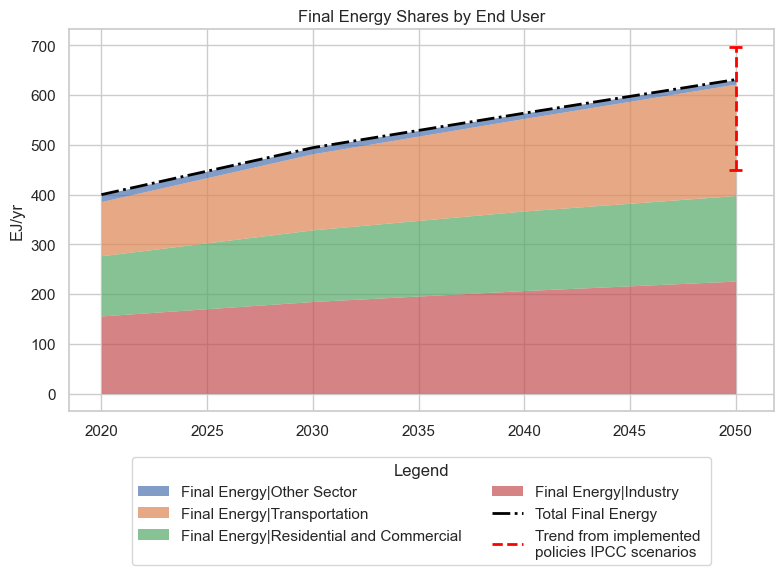

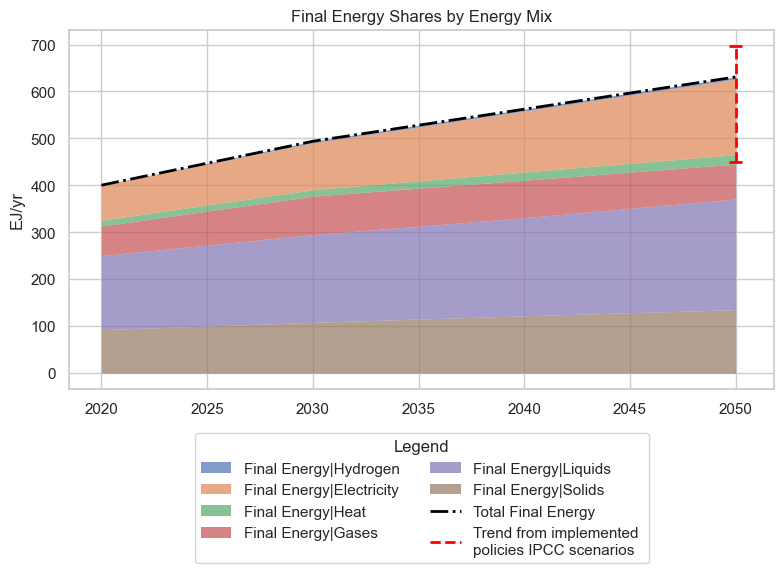

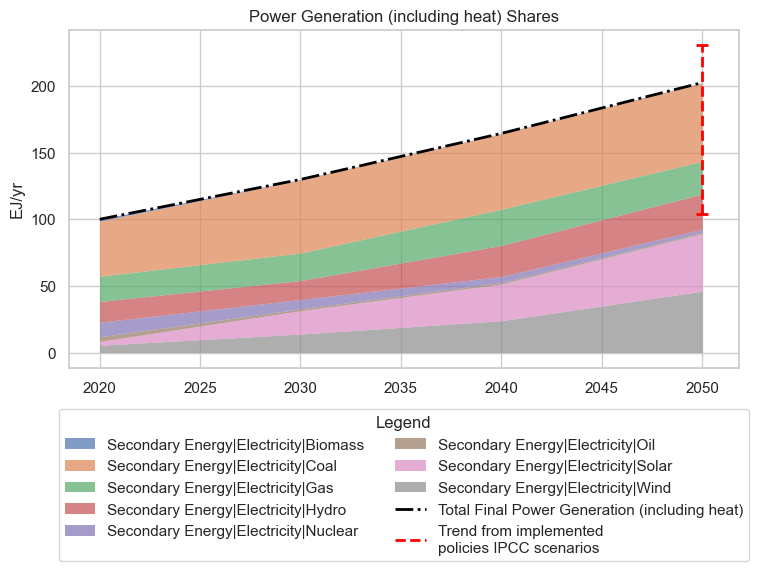

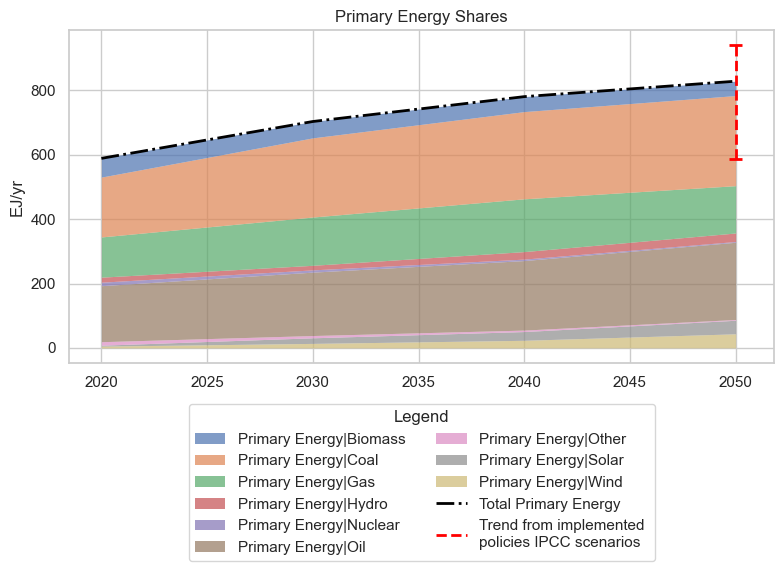

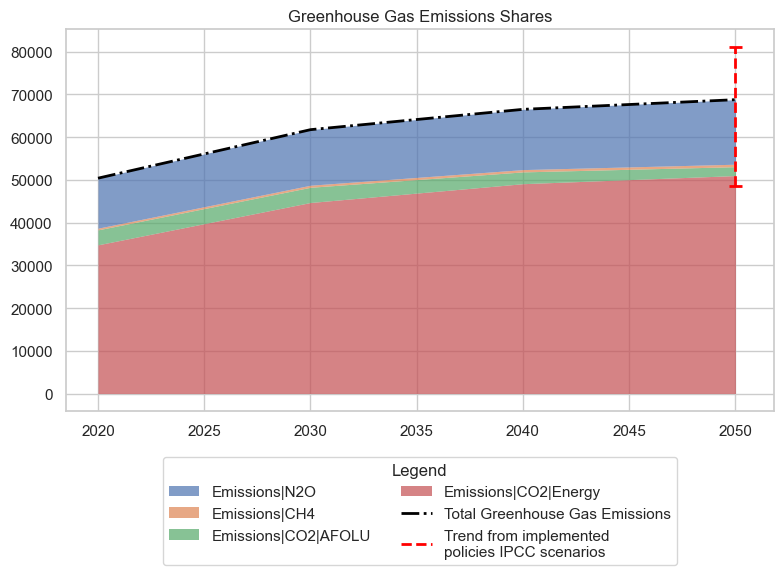

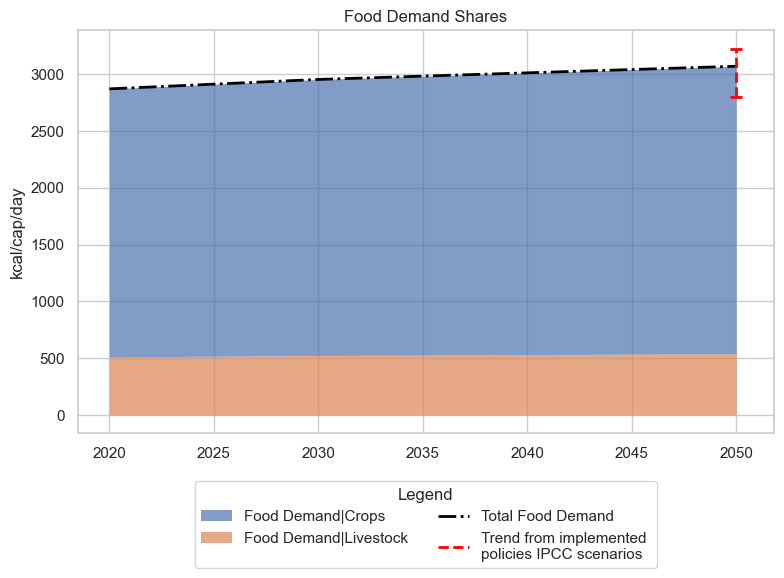

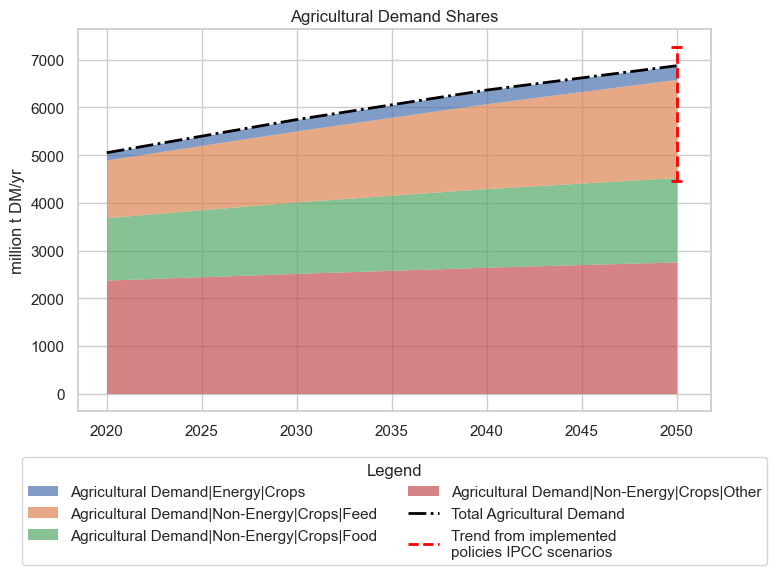

In [12]:
var_dict =  {
    'Final Energy Shares by End User':[[
        'Final Energy|Other Sector',
        'Final Energy|Transportation',
        'Final Energy|Residential and Commercial',
        'Final Energy|Industry',
        ],'Final Energy', 'Total Final Energy'],
    'Final Energy Shares by Energy Mix': [[
        'Final Energy|Hydrogen',
        'Final Energy|Electricity',
        'Final Energy|Heat',
        'Final Energy|Gases',
        'Final Energy|Liquids',
        'Final Energy|Solids',
        ],'Final Energy', 'Total Final Energy'],
    'Power Generation (including heat) Shares':[[
        'Secondary Energy|Electricity|Biomass',
        'Secondary Energy|Electricity|Coal',
        'Secondary Energy|Electricity|Gas',
        'Secondary Energy|Electricity|Hydro',
        'Secondary Energy|Electricity|Nuclear',
        'Secondary Energy|Electricity|Oil',
        # 'Secondary Energy|Electricity|Other',
        'Secondary Energy|Electricity|Solar',
        'Secondary Energy|Electricity|Wind',
    ],'Secondary Energy|Electricity', 'Total Final Power Generation (including heat)'],
    'Primary Energy Shares':[[
        'Primary Energy|Biomass',
        'Primary Energy|Coal',
        'Primary Energy|Gas',
        'Primary Energy|Hydro',
        'Primary Energy|Nuclear',
        'Primary Energy|Oil',
        'Primary Energy|Other',
        'Primary Energy|Solar',
        'Primary Energy|Wind',
    ],'Primary Energy', 'Total Primary Energy'],
    'Greenhouse Gas Emissions Shares':[[
        # 'Emissions|F-Gases',
        'Emissions|N2O',
        'Emissions|CH4',
        'Emissions|CO2|AFOLU',
        'Emissions|CO2|Energy',
    ], 'Emissions|Kyoto Gases', 'Total Greenhouse Gas Emissions'],
    'Food Demand Shares':[[
        'Food Demand|Crops',
        'Food Demand|Livestock',
    ], 'Food Demand', 'Total Food Demand'],
    'Agricultural Demand Shares':[[
        'Agricultural Demand|Energy|Crops',
        'Agricultural Demand|Non-Energy|Crops|Feed',
        'Agricultural Demand|Non-Energy|Crops|Food',
        'Agricultural Demand|Non-Energy|Crops|Other'
    ], 'Agricultural Demand|Crops', 'Total Agricultural Demand'],
    }

for share in var_dict.keys():

    variable = var_dict[share][1]
    df_ar6_energy_c78_data = df_ar6_energy_c78.filter(year=[2050], variable=variable).data
    min_values_c78 = df_ar6_energy_c78_data['value'].min()
    max_values_c78 = df_ar6_energy_c78_data['value'].max()

    var_list = var_dict[share][0]    

    data = df_geo.filter(variable=var_list,
            year=[2010, 2020, 2030, 2040, 2050])
    
    fig, ax = plt.subplots(figsize=(8, 6),)

    
    data.plot.stack(title=f'{share}',
                    total={'lw':2, 'linestyle':'-.', 'label':var_dict[share][2]},
                    ax=ax, 
                    alpha=0.7, 
                    order=var_list)
    
    # Add uncertainty ranges to total
    # Calculate min and max across models for each year
    year = 2050
    legend_label = "Trend from implemented \npolicies IPCC scenarios"
    color='red'
    cap_width = 0.3
    
    ax.vlines(x=year, ymin=min_values_c78, ymax=max_values_c78, color=color, linestyle='--', lw=2, label=legend_label)
    # Caps
    ax.hlines(y=min_values_c78, xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)
    ax.hlines(y=max_values_c78, xmin=year - cap_width, xmax=year + cap_width, color=color, lw=2)

    # ax.set_ylim(-15000, 55000)
    ax.set(xlabel=None)
    ax.legend().set_visible(True)
    # ax.set_xlim(2010, 2050)
    ax.legend(title="Legend", loc='upper center' , bbox_to_anchor=(0.5, -0.1), ncols=2) 
    plt.tight_layout()

    # Manually add Legend
    # handles_c78, labels_c78 = axes[0].get_legend_handles_labels()
    # handles_c78, labels_c78 = handles_c78[:-1], labels_c78[:-1]
    # new_handles = handles_c78
    # new_labels = labels_c78
    variable_name = share.replace("(", "_").replace(" ", "_")
    plt.savefig(f"../../../plots/TOD/chpt_11/report/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/chpt_11/report/{variable_name}.svg", bbox_inches="tight")
    

# Land Cover

In [13]:
# figure 11.9
pyam.iiasa.Connection().valid_connections
pyam.iiasa.platforms()
df_land = pyam.read_iiasa(
            'geo7_internal',
            variable=[
                    'Land Cover|Cropland', 
                    'Land Cover|Pasture',
                    'Land Cover|Forest',
                    'Land Cover|Built-up Area',
                    'Land Cover|Other Natural Land',
                    ],
            region='World',
            scenario=['REF-v2'],
            model=['AIM/Hub-Global 2.4'],
)

df_land = df_land.filter(year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_land.aggregate('Land Cover|Forest and Other Natural Land', ['Land Cover|Forest','Land Cover|Other Natural Land'], append=True)
df_land = df_land.filter(variable=['Land Cover|Forest','Land Cover|Other Natural Land'], keep=False)
df_land.timeseries()

[INFO] 09:10:15 - pyam.iiasa: You are connected as user `stephenmaycock`
[WARNING] 09:10:15 - pyam.iiasa: IIASA is migrating to a database infrastructure using the ixmp4 package.Use `pyam.iiasa.platforms()` to list available ixmp4 databases.



Platforms accessible via 'https://api.manager.ece.iiasa.ac.at/v1'

Name                Access    Notice
public-test         public    This is a public ixmp4 test instance hosted by the IIA... 
ecemf               public    This is the public database instance for the Horizon 2... 
ssp-extensions      public    This is the SSP-Extensions project database. All data ... 
ssp                 public    This platform has the "basic drivers", i.e., GDP and p... 
socdr               public    This platform contains the data for the "State of CDR ... 
shape               public    This database has key scenarios developed by the SHAPE... 
navigate            public    This platform contains the data for the "NAVIGATE" Sce... 
genie               public    GENIE Knowledge Hubs                                      
elevate             public    This is the public database instance for the Horizon E... 
playground-publi... public    
ariadne2            public    This is the public database insta

[INFO] 09:10:16 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 09:10:16 - pyam.iiasa: You are connected as user `stephenmaycock`


2020  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha    77.4171   
                                   Land Cover|Cropland                      million ha  1549.5265   
                                   Land Cover|Forest and Other Natural Land million ha  8106.7596   
                                   Land Cover|Pasture                       million ha  3299.2826   

                                                                                             2025  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha    84.0411   
                                   Land Cover|Cropland                      million ha  1579.0347   
                                   Land Cover|Forest and Other Natural Land million ha  8088.8184   
                                   Land Cover|Pasture                       million ha  3282.9230   

                                                                                             2030  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha    90.6650   
                                   Land Cover|Cropland                      million ha  1599.2033   
                                   Land Cover|Forest and Other Natural Land million ha  8070.8773   
                                   Land Cover|Pasture                       million ha  3266.5634   

                                                                                             2035  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha    97.2482   
                                   Land Cover|Cropland                      million ha  1627.9194   
                                   Land Cover|Forest and Other Natural Land million ha  8057.4138   
                                   Land Cover|Pasture                       million ha  3251.9094   

                                                                                             2040  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha   103.8314   
                                   Land Cover|Cropland                      million ha  1647.7263   
                                   Land Cover|Forest and Other Natural Land million ha  8043.9502   
                                   Land Cover|Pasture                       million ha  3237.2553   

                                                                                             2045  \
model              scenario region variable                                 unit                    
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha   110.8297   
                                   Land Cover|Cropland                      million ha  1666.7270   
                                   Land Cover|Forest and Other Natural Land million ha  8029.1960   
                                   Land Cover|Pasture                       million ha  3225.0737   

                                                                                             2050  
model              scenario region variable                                 unit                   
AIM/Hub-Global 2.4 REF-v2   World  Land Cover|Built-up Area                 million ha   117.8279  
                                   Land Cover|Cropland                      million ha  1684.1039  
                                   Land Cover|Fores

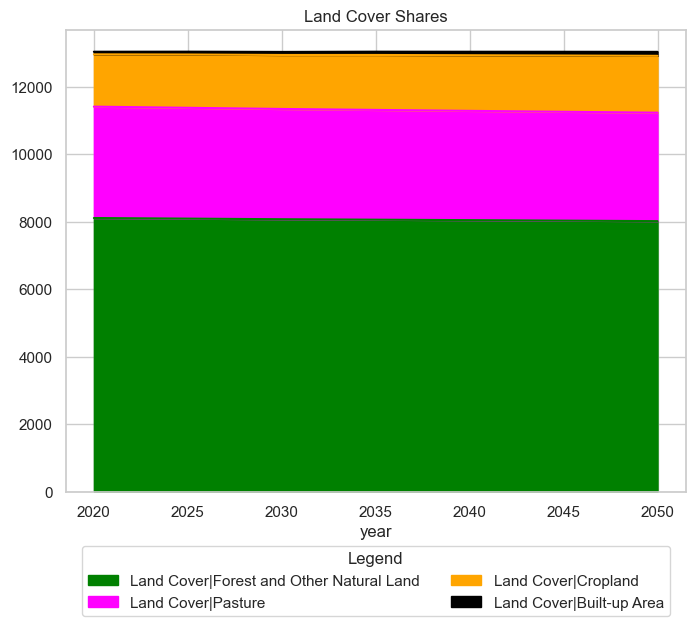

<Figure size 640x480 with 0 Axes>

In [14]:
# Assuming `df_land` is a pyam.IamDataFrame
# Convert the pyam IamDataFrame to a standard pandas DataFrame
df_land_pandas = df_land.data.pivot_table(index='year', columns='variable', values='value')

# Define the color map as a dictionary
cmap = {
    'Land Cover|Built-up Area': 'black',
    'Land Cover|Cropland': 'orange', 
    'Land Cover|Pasture': 'magenta',
    'Land Cover|Forest and Other Natural Land': 'green'
}

# Define the order of the variables and map their colors
order = [
    'Land Cover|Forest and Other Natural Land',
    'Land Cover|Pasture',
    'Land Cover|Cropland', 
    'Land Cover|Built-up Area'
]
colors = [cmap[var] for var in order]

# Plot the pandas DataFrame using the defined colors
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a stacked area plot with specified colors
df_land_pandas[order].plot(kind='area', stacked=True, color=colors, ax=ax)

# Set the title and show the plot
ax.set_title('Land Cover Shares')
ax.legend(title="Legend", loc='upper center' , bbox_to_anchor=(0.5, -0.1), ncols=2)
plt.show()
plt.savefig(f"../../../plots/TOD/chpt_11/report/Land_Cover_Shares.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/chpt_11/report/Land_Cover_Shares.svg", bbox_inches="tight") 

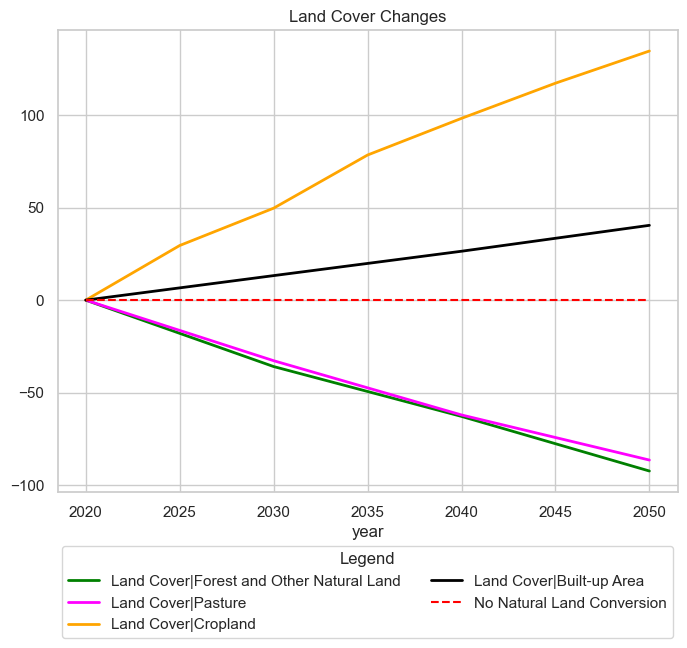

<Figure size 640x480 with 0 Axes>

In [15]:
df_land_offset = df_land.offset(year=2020)
# Define the color map as a dictionary
cmap = {
    'Land Cover|Built-up Area': 'black',
    'Land Cover|Cropland': 'orange', 
    'Land Cover|Pasture': 'magenta',
    'Land Cover|Forest and Other Natural Land': 'green'
}

# Define the order of the variables and map their colors
order = [
    'Land Cover|Forest and Other Natural Land',
    'Land Cover|Pasture',
    'Land Cover|Cropland', 
    'Land Cover|Built-up Area'
]

# Convert the pyam dataframe to pandas for plotting (if needed)
df_land_offset_pandas = df_land_offset.data.pivot(index='year', columns='variable', values='value')

# Define the colors in the same order
colors = [cmap[var] for var in order]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line plot with the specified colors for each variable
df_land_offset_pandas[order].plot(ax=ax, color=colors, lw=2)

# Add the horizontal line for reference (no natural land conversion)
ax.hlines(y=0, xmin=2020, xmax=2050, color='red', lw=1.5, linestyles='--', label='No Natural Land Conversion')

# Set the title and legend
ax.set_title('Land Cover Changes')
ax.legend(title="Legend", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncols=2)

# Show the plot
plt.show()
plt.savefig(f"../../../plots/TOD/chpt_11/report/Land_Cover_Changes.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/chpt_11/report/Land_Cover_Changes.svg", bbox_inches="tight")  


# Emissions

In [16]:
df_emissions_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[ 
            'Emissions|BC', 
            'Emissions|CO', 
            'Emissions|NOx', 
            'Emissions|NH3', 
            'Emissions|OC', 
            'Emissions|Sulfur', 
            'Emissions|VOC'],
    region='World',
    scenario=list(ar6_c78_scenarios),
)

[INFO] 09:10:19 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:10:19 - pyam.iiasa: You are connected as user `stephenmaycock`


In [17]:
df_emissions_geo = pyam.IamDataFrame('../../../data/TOD/model_results/to_share/model_results_to_share.xlsx')
df_emissions_geo = df_emissions_geo.filter(
    variable=[
            'Emissions|BC', 
            'Emissions|CO', 
            'Emissions|NOx', 
            'Emissions|NH3', 
            'Emissions|OC', 
            'Emissions|Sulfur', 
            'Emissions|VOC'],
    region='World',
    scenario='REF',
)
df_emissions_geo.timeseries()

[INFO] 09:10:27 - pyam.core: Reading file ..\..\..\data\TOD\model_results\to_share\model_results_to_share.xlsx


2020    2030    2040  \
model     scenario region variable         unit                                
Emissions REF      World  Emissions|BC     Mt BC/yr     8.34    8.35    7.11   
                          Emissions|CO     Mt CO/yr   960.00  919.00  744.00   
                          Emissions|NH3    Mt NH3/yr   69.00   73.90   77.00   
                          Emissions|NOx    Mt NO2/yr  124.00  144.00  125.00   
                          Emissions|OC     Mt OC/yr    36.60   33.00   27.10   
                          Emissions|Sulfur Mt SO2/yr   81.50   89.90   74.30   
                          Emissions|VOC    Mt VOC/yr  157.00  179.00  172.00   

                                                        2050  
model     scenario region variable         unit               
Emissions REF      World  Emissions|BC     Mt BC/yr     5.37  
                          Emissions|CO     Mt CO/yr   544.00  
                          Emissions|NH3    Mt NH3/yr   79.10  
                          Emissions|NOx    Mt NO2/yr   90.30  
                          Emissions|OC     Mt OC/yr    20.50  
                          Emissions|Sulfur Mt SO2/yr   51.40  
                          Emissions|VOC    Mt VOC/yr  150.00

In [18]:
df_emissions_ar6.validate(
    variable='Emissions|NH3', year=2020, lower_bound=10, exclude_on_fail=True
)
df_emissions_ar6 = df_emissions_ar6.filter(exclude=False)

[INFO] 09:10:28 - pyam.validation: 10 of 3745 data points do not satisfy the criteria
[INFO] 09:10:28 - pyam.validation: 10 scenarios failed validation and will be set as `exclude=True`.


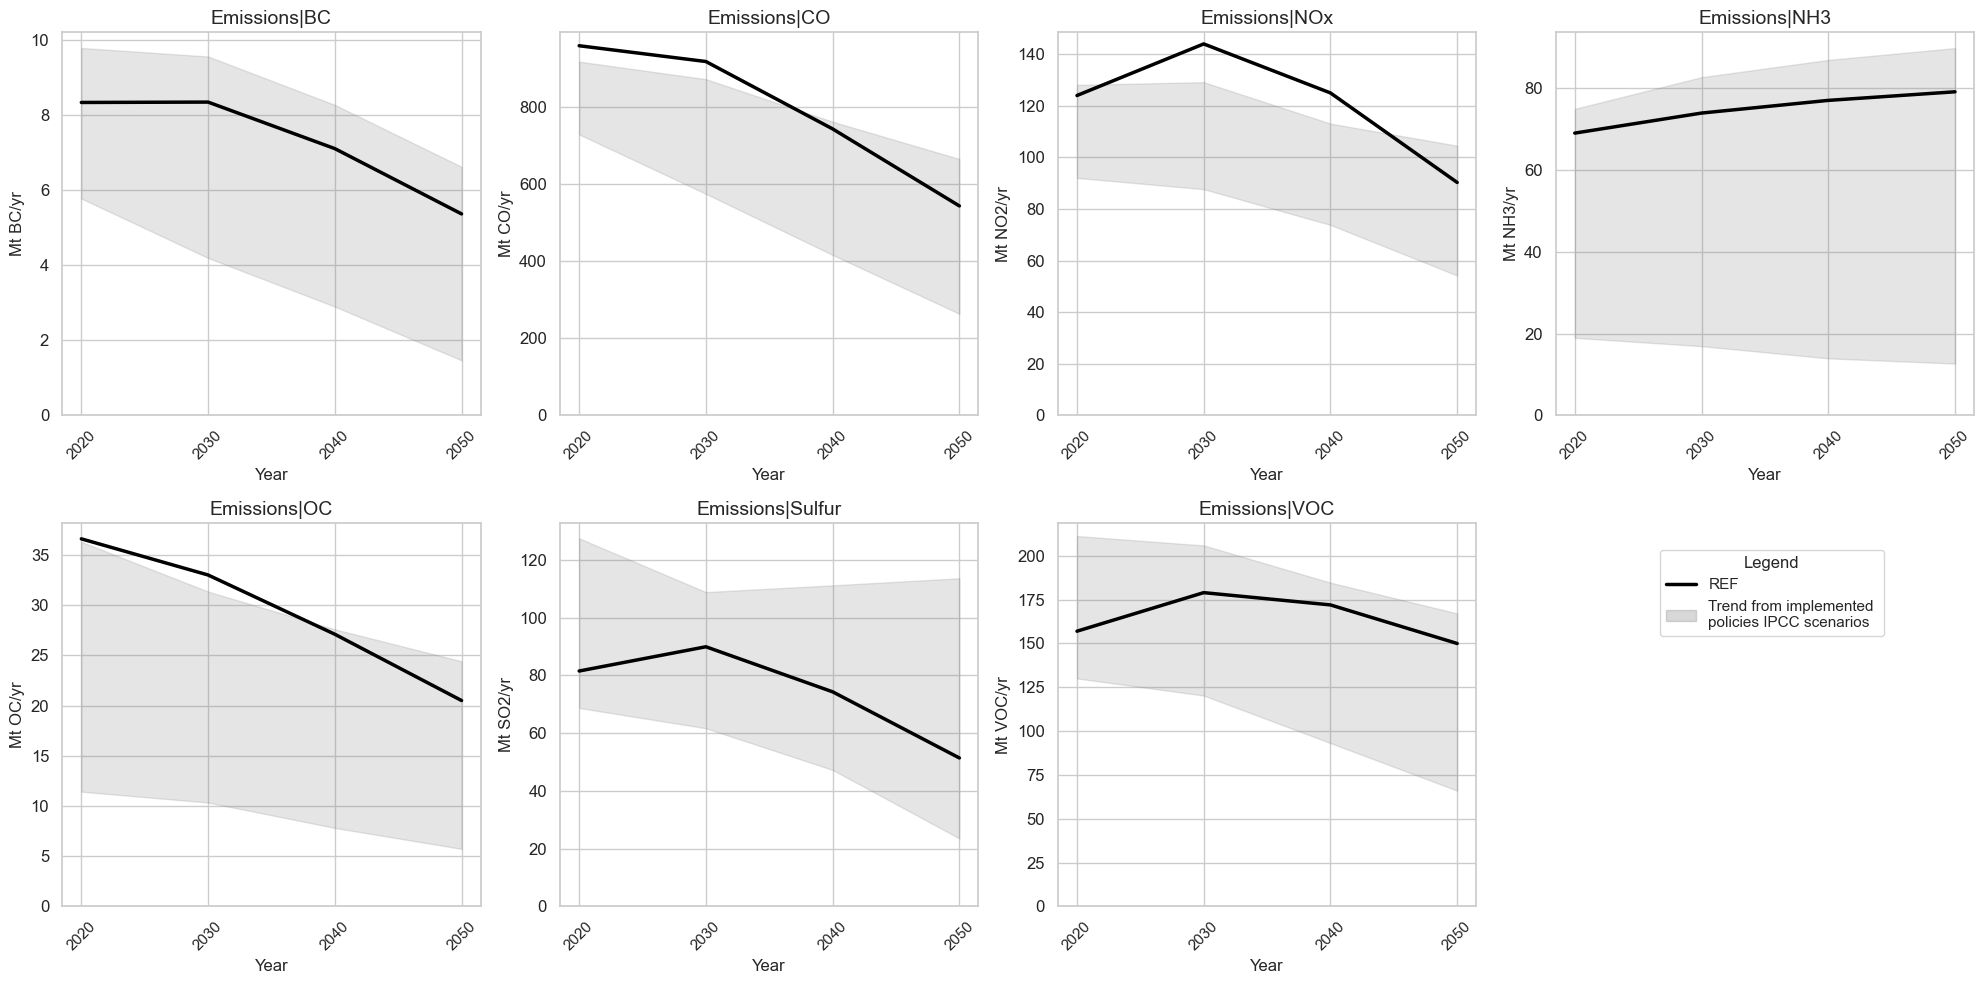

In [23]:
df_geo_data = df_emissions_geo.filter(year=[2020, 2030, 2040, 2050]).data
df_ar6_2050 = df_emissions_ar6.filter(year=[2020, 2030, 2040, 2050]).data

variables = [
             'Emissions|BC', 
             'Emissions|CO', 
             'Emissions|NOx', 
             'Emissions|NH3', 
             'Emissions|OC', 
             'Emissions|Sulfur', 
             'Emissions|VOC',
]

# Define a color palette for scenarios
scenario_colors = {
    "REF": "black",
    "REF-1p5C": "blue",
    "LIFE-TP": "orange",
    "TECH-TP": "magenta",
}

# Set up the figure and axes for subplots
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axs = axs.flatten()  # Flatten to easily iterate through axes
df_export = pd.DataFrame()
for i, variable in enumerate(variables):
    ax = axs[i]
    
    # Filter data for the current variable
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    df_ar6_data = df_ar6_2050[df_ar6_2050["variable"] == variable]
    min_values_c78 = df_ar6_data['value'].min()
    max_values_c78 = df_ar6_data['value'].max()

    # Plot GEO data
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    
    # Plot AR6 data with uncertainty ranges
    sns.lineplot(
        data=df_ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey',
        errorbar=(lambda x: (x.min(), x.max()))
    )

    ax.legend().set_visible(False)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel(geo_data["unit"].iloc[0], fontsize=12)
    ax.set_ylim(min(0, ax.get_ylim()[0]), ax.get_ylim()[1])
    ax.set_title(variable, fontsize=14)
    ax.grid(True)
    ax.set_xticks([2020, 2030, 2040, 2050])
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=12)
    # df_ar6_data to csv
    df_min_max = df_ar6_data.groupby("year")["value"].agg(["min", "max"]).reset_index()
    df_min_max = df_min_max.melt(id_vars="year", value_name="value", var_name="stat")
    df_min_max["variable"] = variable
    df_min_max["unit"] = geo_data["unit"].iloc[0]
    df_min_max["scenario"] = "AR6"
    df_export = pd.concat([df_export, df_min_max])

output_file = f"../../../plots/TOD/final_figures/chpt_10/data_for_figures/10.8_air_pollution.xlsx"
df_export.to_excel(output_file, index=False)
# Leave the last subplot empty
axs[-1].axis('off')
# Manually add Legend
handles, labels = ax.get_legend_handles_labels()
legend_patch = mpatches.Patch(color='grey', alpha=0.3)
handles = handles + [legend_patch]
labels = labels + ['Trend from implemented \npolicies IPCC scenarios']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(0.95, 0.45)) 


plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()

# Adjust layout to ensure everything fits
plt.tight_layout()
plt.show()


# Air Pollution AIM Harmonized (10.8)

[INFO] 12:39:56 - pyam.core: Reading file ..\..\..\data\TOD\model_results\raw\240513_GEO7_AIM.xlsx


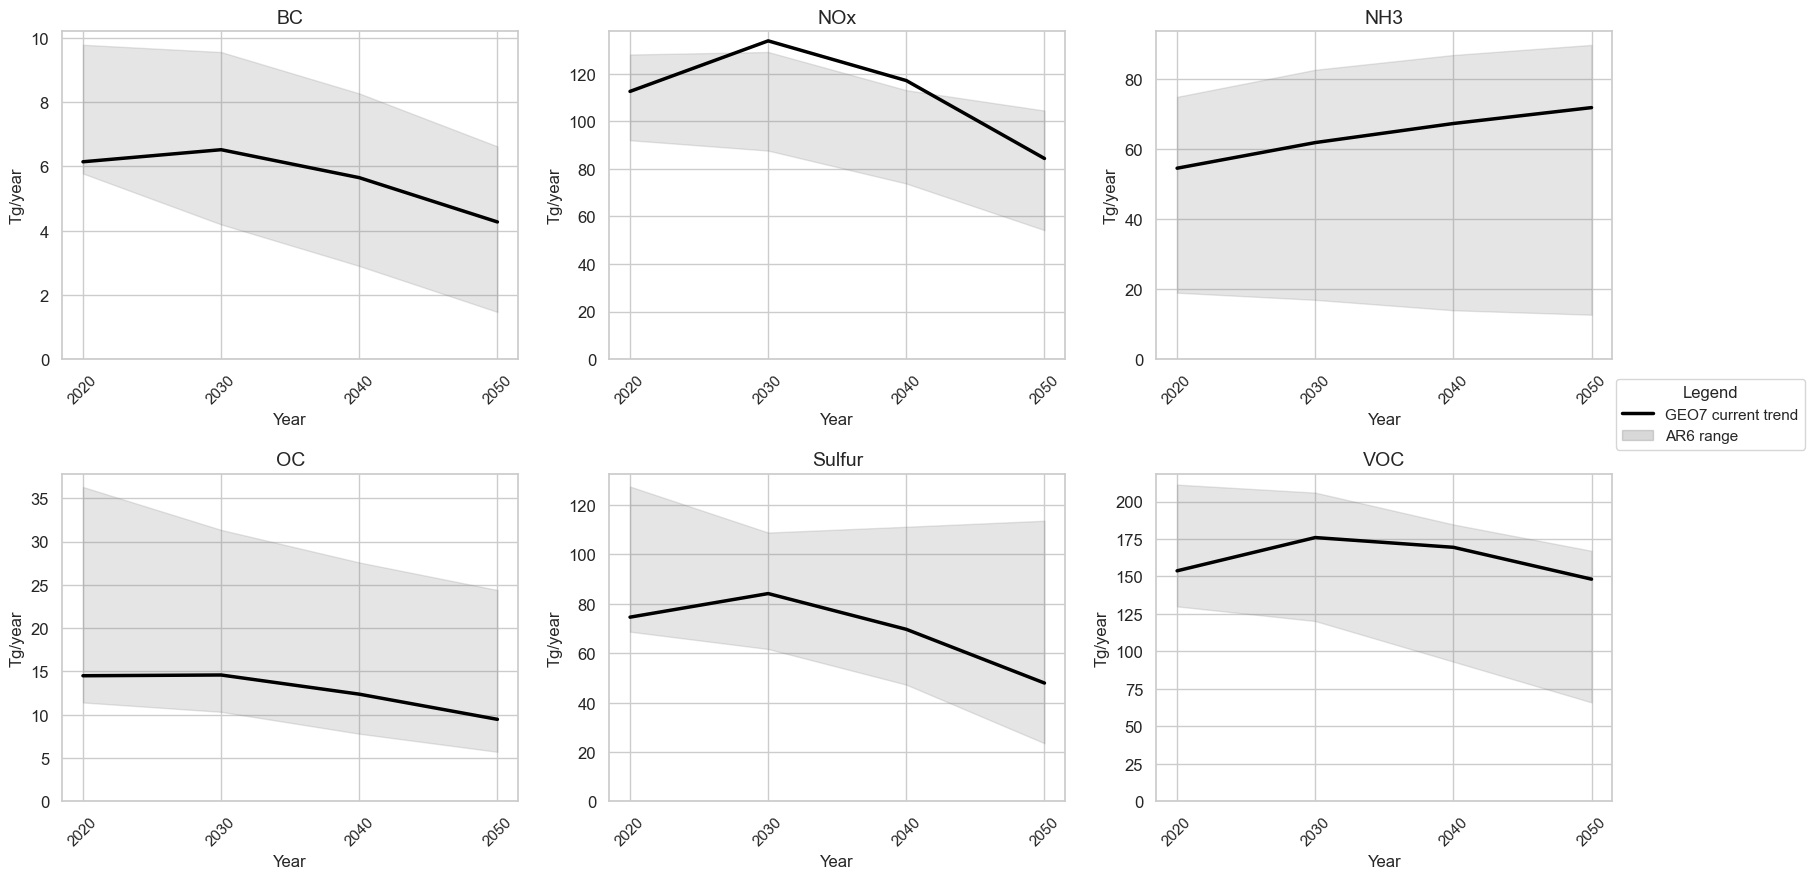

In [40]:
df_emissions_AIM_harmonized = pyam.IamDataFrame('../../../data/TOD/model_results/raw/240513_GEO7_AIM.xlsx')
df_emissions_AIM_harmonized = df_emissions_AIM_harmonized.filter(
    variable=[
            'Emissions|BC', 
            'Emissions|CO', 
            'Emissions|NOx', 
            'Emissions|NH3', 
            'Emissions|OC', 
            'Emissions|Sulfur', 
            'Emissions|VOC'],
    region='World',
    scenario='REF-v2',
)
df_emissions_AIM_harmonized.timeseries()
df_emissions_AIM_harmonized = df_emissions_AIM_harmonized.filter(year=[2020, 2030, 2040, 2050]).data
df_ar6_2050_AIM_harmonized = df_emissions_ar6.filter(year=[2020, 2030, 2040, 2050]).data

variables = [
             'Emissions|BC', 
             'Emissions|NOx', 
             'Emissions|NH3', 
             'Emissions|OC', 
             'Emissions|Sulfur', 
             'Emissions|VOC',
]
variable_labels = {
    'Emissions|BC': 'BC',
    'Emissions|NOx': 'NOx',
    'Emissions|NH3': 'NH3',
    'Emissions|OC': 'OC',
    'Emissions|Sulfur': 'Sulfur',
    'Emissions|VOC': 'VOC',
}
# Define a color palette for scenarios
scenario_colors = {
    "REF-v2": "black"
}

# Set up the figure and axes for subplots
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axs = axs.flatten()  # Flatten to easily iterate through axes

for i, variable in enumerate(variables):
    ax = axs[i]
    variable_label = variable_labels[variable]
    # Filter data for the current variable
    AIM_harmonized_data = df_emissions_AIM_harmonized[df_emissions_AIM_harmonized["variable"] == variable]
    df_ar6_AIM_harmonized_data = df_ar6_2050_AIM_harmonized[df_ar6_2050_AIM_harmonized["variable"] == variable]
    min_values_c78 = df_ar6_AIM_harmonized_data['value'].min()
    max_values_c78 = df_ar6_AIM_harmonized_data['value'].max()

    # Plot GEO data
    sns.lineplot(
        data=AIM_harmonized_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    
    # Plot AR6 data with uncertainty ranges
    sns.lineplot(
        data=df_ar6_AIM_harmonized_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        color='grey',
        errorbar=(lambda x: (x.min(), x.max()))
    )

    ax.legend().set_visible(False)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Tg/year", fontsize=12)
    ax.set_ylim(min(0, ax.get_ylim()[0]), ax.get_ylim()[1])
    ax.set_title(variable_label, fontsize=14)
    ax.grid(True)
    ax.set_xticks([2020, 2030, 2040, 2050])
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelsize=12)

# Manually add Legend
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(hspace=0.35)
handles, labels = ax.get_legend_handles_labels()
labels = ['GEO7 current trend']
legend_patch = mpatches.Patch(color='grey', alpha=0.3)
handles = handles + [legend_patch]
labels = labels + ['AR6 range']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1, 0.54)) 
plt.grid(True)


plt.savefig(f"../../../plots/TOD/chpt_11/diagnostic/air_pollution_harm_request.png", bbox_inches="tight")
plt.show()

# Old Figures

[INFO] 15:45:56 - pyam.core: Reading file ..\..\..\data\TOD\model_results\to_share\model_results_to_share.xlsx
[INFO] 15:45:58 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 15:45:58 - pyam.iiasa: You are connected as user `stephenmaycock`


ValueError: 'yerr' must not contain negative values

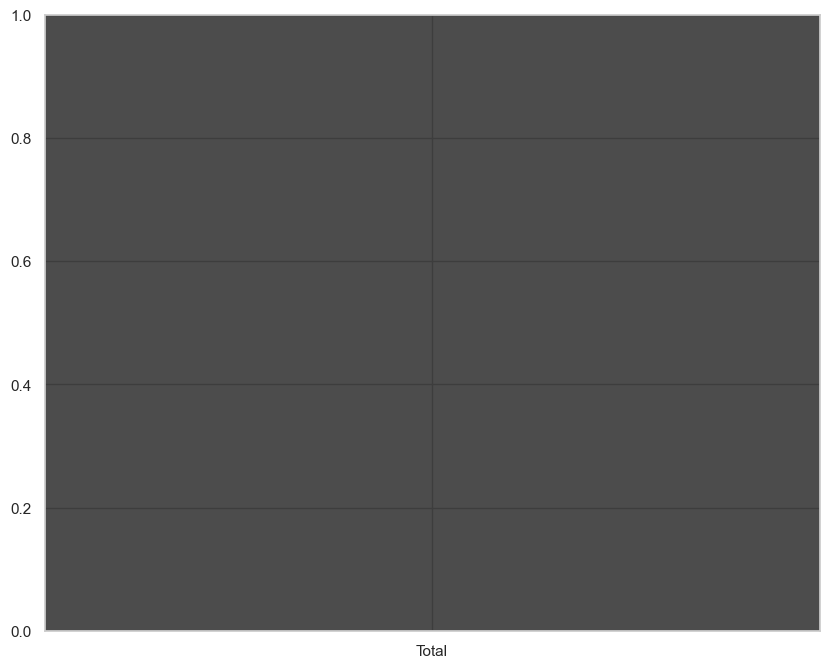

In [36]:
df_emissions_geo = pyam.IamDataFrame('../../../data/TOD/model_results/to_share/model_results_to_share.xlsx')
df_emissions_ar6 = pyam.read_iiasa(
    'ar6-public',
    region='World',
    scenario=list(ar6_c78_scenarios),
)
emissions_data_ar6 = df_emissions_ar6.filter(variable=['Emissions|CO2', 
                                                'Emissions|N2O', 
                                                'Emissions|CH4', 
                                                'Emissions|F-Gases'], 
                                    year=[2050]).data
emissions_data_geo = df_emissions_geo.filter(variable=['Emissions|CO2', 
                                                'Emissions|N2O', 
                                                'Emissions|CH4', 
                                                'Emissions|F-Gases'], 
                                    year=[2050]).data

variables = emissions_data_geo.variable.unique()
for variable in variables:
    temp_ar6 = emissions_data_ar6[emissions_data_ar6['variable'] == variable]
    temp_max = temp_ar6.max().value
    temp_min = temp_ar6.min().value
    temp_geo = emissions_data_geo[emissions_data_geo['variable'] == variable].iloc[0].value

    
    # Update uncertainty_lower and uncertainty_upper for the specific variable
    emissions_data_geo.loc[emissions_data_geo['variable'] == variable, 'uncertainty_lower'] = temp_geo - temp_min
    emissions_data_geo.loc[emissions_data_geo['variable'] == variable, 'uncertainty_upper'] = max(0, temp_max - temp_geo)

emissions_data_geo = emissions_data_geo.sort_values('value', ascending=False).reset_index(drop=True)
# Calculate bottom values for stacking
bottom_values = [0] + emissions_data_geo['value'].cumsum().tolist()[:-1]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Define the color palette for scenarios
var_colors = {
    "Emissions|CO2": "brown",
    "Emissions|CH4": "blue",
    "Emissions|N2O": "orange",
    "Emissions|F-Gases": "magenta",
}

# Add a single bar representing the total sum
total_value = emissions_data_geo['value'].sum()
total_lower_uncertainty = emissions_data_geo['uncertainty_lower'].sum()
total_upper_uncertainty = emissions_data_geo['uncertainty_upper'].sum()

plt.bar(
    x='Total',
    height=total_value,
    yerr=[[total_lower_uncertainty], [total_upper_uncertainty]],
    capsize=5,
    color='black',
    alpha=0.7,
    label='Total GHG'
)

# Stacked column bar plot with error bars
for i, variable in enumerate(var_colors.keys()):
    category_values = emissions_data_geo['value'].iloc[i]
    category_bottom = emissions_data_geo['value'].iloc[:i].sum()
    # category_uncertainty = emissions_data_geo[emissions_data_geo['variable'] == variable]['Uncertainty'].values

    lower_uncertainty = emissions_data_geo['uncertainty_lower'].iloc[i]
    upper_uncertainty = emissions_data_geo['uncertainty_upper'].iloc[i]

    ax.bar(
        x=variable,  # Use index values directly
        height=category_values,
        bottom=category_bottom,
        color=var_colors[variable],
        yerr=[[lower_uncertainty], [upper_uncertainty]],
        capsize=5,
        alpha=0.7,
        label=variable,
    )

ax.set_xticklabels(labels=['Total GHG', 
                          "CO2",
                          "CH4",
                          "N2O",
                          "F-Gases"
                          ],
                    rotation=45,
                    fontsize=14)
# ax.legend().set_visible(False)

# Manually add Legend
handles, labels = ax.get_legend_handles_labels()
# Define the coordinates for the line in the shape of |--|

# Create a Line2D with the specified coordinates
legend_line = Line2D([0, 0], [0, 0], color='black', linestyle='-', linewidth=2)

handles = handles + [legend_line]
labels = labels + ['Trend from implemented \npolicies IPCC scenarios ranges']
fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.3, 0.9))

plt.xlabel('Emissions')
plt.ylabel('Mt CO2equiv')
plt.title('Green House Gas Shares 2050')

# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()

# plt.savefig(f"./plots/chapter_11/ghg_shares.png", bbox_inches="tight")
# plt.close()


# CO2 stacked lines

[INFO] 15:47:23 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 15:47:23 - pyam.iiasa: You are connected as user `stephenmaycock`


ValueError: Can not plot multiple scenarios in stack_plot with x=year, stack=variable

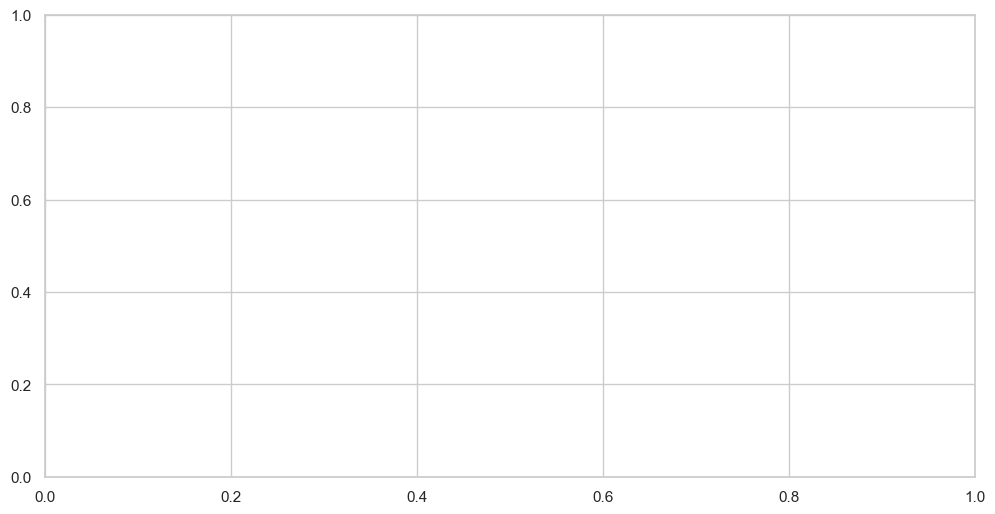

In [37]:
df_geo_co2 = pyam.read_iiasa(
    'geo7_internal',
    variable=['Emissions|CO2|AFOLU',
              'Emissions|CO2|Energy',
            ],
    region='World',
    scenario='REF',
    model='AIM/Hub-Global 2.4',
)

df_geo_co2.multiply('Emissions|CO2|AFOLU', 1, 'Emissions|CO2|Land Use', ignore_units='Mt CO2/yr', append=True)


cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

data=df_geo_co2.filter(variable=['Emissions|CO2|Energy', 'Emissions|CO2|Land Use',],)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

data.plot.stack(title='CO2 Emissions Share', ax=ax, alpha=0.7, cmap=cmap)
plt.legend(bbox_to_anchor=(1.3, 0.9))
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xlim(2010, 2050)
plt.tight_layout()


# plt.savefig(f"./plots/chapter_11/CO2_shares.png", bbox_inches="tight")
# plt.close()

# MSA Test

In [38]:
df_geo_msa = pyam.read_iiasa(
    'geo7_internal',
    variable=[
        'Terrestrial Biodiversity|MSA',
        'Terrestrial Biodiversity|MSA Loss|Encroachment',
        'Terrestrial Biodiversity|MSA Loss|Fragmentation',
        'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
        'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
        'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
            ],
    region='World',
    scenario='REF',
    
)

df_geo_msa.timeseries()

[INFO] 15:47:37 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 15:47:37 - pyam.iiasa: You are connected as user `stephenmaycock`


2000  \
model            scenario   region variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP-v2 World  Terrestrial Biodiversity|MSA                       %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Land... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      NaN   
                 REF-v2     World  Terrestrial Biodiversity|MSA                       %     61.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      3.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      6.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Land... %     23.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      4.0   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA                       %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Land... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      NaN   

                                                                                            2020  \
model            scenario   region variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP-v2 World  Terrestrial Biodiversity|MSA                       %     59.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      7.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Land... %     24.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      4.0   
                 REF-v2     World  Terrestrial Biodiversity|MSA                       %     59.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      2.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      3.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Clim... %      7.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Land... %     24.0   
                                   Terrestrial Biodiversity|MSA Loss|Pressure Nitr... %      4.0   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA                       %     59.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %    

In [39]:
# Define the new order of columns
new_variable_order = ['Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
                    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
                    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
                    'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
                    'Terrestrial Biodiversity|MSA Loss|Encroachment',
                    'Terrestrial Biodiversity|MSA Loss|Fragmentation',
                    ] 



# Sort the DataFrame based on the variable names column and the new order
df_data = df_geo_msa.filter(year=[2015, 2030, 2050], variable=new_variable_order).data.sort_values(by='variable', key=lambda x: pd.Categorical(x, categories=new_variable_order, ordered=True))

# # Update the Pyam DataFrame with the modified pandas DataFrame
# df = pyam.IamDataFrame(df_data)


# # Now df contains the DataFrame with columns in the new order
# df.timeseries()
df_data

,model,scenario,region,variable,unit,year,value
9,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2050,23.0
33,IMAGE-GLOBIO 3.3,TECH-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2050,23.0
32,IMAGE-GLOBIO 3.3,TECH-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2030,24.0
20,IMAGE-GLOBIO 3.3,REF-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2030,24.0
21,IMAGE-GLOBIO 3.3,REF-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2050,25.0
8,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Lan...,%,2030,24.0
18,IMAGE-GLOBIO 3.3,REF-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2030,8.0
19,IMAGE-GLOBIO 3.3,REF-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2050,10.0
6,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2030,8.0
30,IMAGE-GLOBIO 3.3,TECH-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Pressure Cli...,%,2030,8.0


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

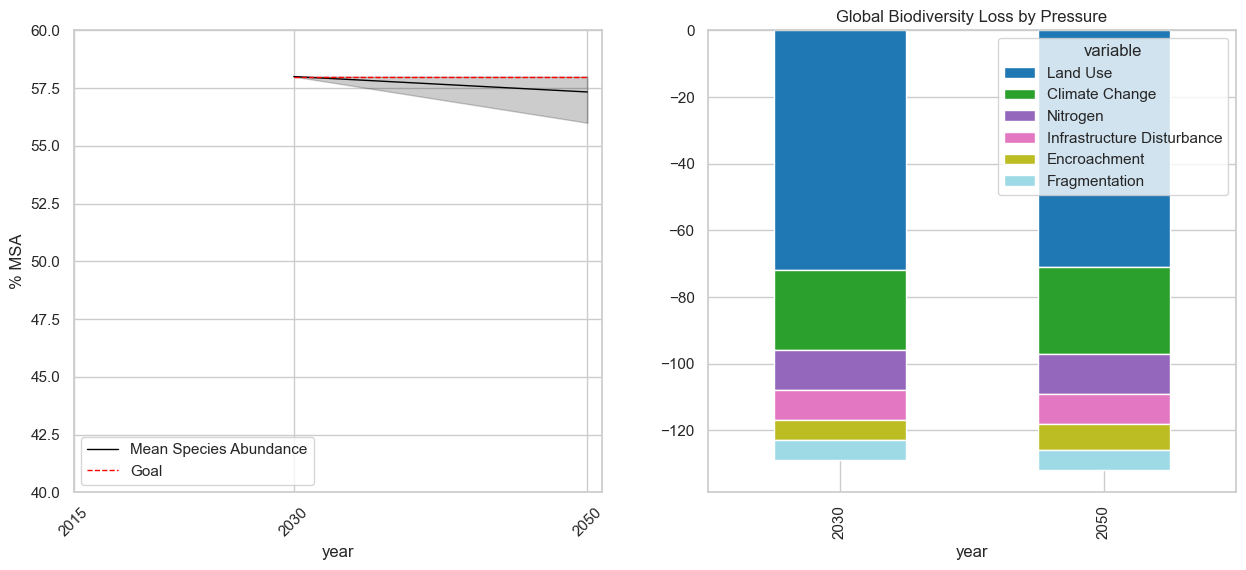

In [40]:
# Plotting
fig, axes = plt.subplots(figsize=(15, 6), ncols=2)

df_negative = df_data.groupby(['year', 'variable', ])['value'].sum().unstack() * -1
# Reorder bars
df_negative = df_negative[new_variable_order]
df_negative.rename(columns={
    'Terrestrial Biodiversity|MSA Loss|Pressure Land Use':'Land Use',
    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change':'Climate Change',
    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen':'Nitrogen',
    'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance':'Infrastructure Disturbance',
    'Terrestrial Biodiversity|MSA Loss|Encroachment':'Encroachment',
    'Terrestrial Biodiversity|MSA Loss|Fragmentation':'Fragmentation',
}, inplace=True 
)

df_negative.plot(kind='bar', 
                 stacked=True,
                 ax=axes[1],
                 title="Global Biodiversity Loss by Pressure", 
                 cmap='tab20', )


df_msa_only = df_geo_msa.filter(year=[2015, 2030, 2050], variable='Terrestrial Biodiversity|MSA').data
sns.lineplot(
        data=df_msa_only,
        x="year",
        y="value",
        linewidth=1,
        ax=axes[0],
        color='black',
        # linestyle='--'
        label='Mean Species Abundance',
        )

# Target
target_df = df_msa_only.copy()
target_df = target_df[target_df.year.isin([2030, 2050])]
target_df['value'] = target_df[target_df['year'] == 2030]['value'].iloc[0]

sns.lineplot(
        data=target_df,
        x="year",
        y="value",
        linewidth=1,
        ax=axes[0],
        color='red',
        linestyle='--',
        label='Goal'
        )

axes[0].set_ylim(40, 60)
# plt.legend(bbox_to_anchor=(0.73, -0.15), ncols=2)
axes[0].set_ylabel('% MSA')
axes[0].set_xticks([2015, 2030, 2050])
axes[0].set_xticklabels([2015, 2030, 2050], rotation=45)
axes[1].set_xticklabels([2015, 2030, 2050], rotation=45)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncols=2)
axes[1].legend(df_negative.columns, loc='lower center', bbox_to_anchor=(0.5, -0.35), ncols=2)

axes[0].set_title('Mean Species Abundance')

# GNM Test

In [41]:
df_geo_gnm = pyam.read_iiasa(
    'geo7_internal',
    variable=['Resources|Nitrogen|Cropland Budget|Balance', 
              'Resources|Nitrogen|Pasture Budget|Balance',],
    # variable=[
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Biological Fixation',
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Fertilizer',
        # 'Resources|Nitrogen|Cropland Budget|Inputs|Manure',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Biological Fixation',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Fertilizer',
        # 'Resources|Nitrogen|Pasture Budget|Inputs|Manure',
        # 'Resources|Nitrogen|Non-Agricultural Land Budget|Inputs|Biological Fixation',
        # 'Resources|Phosphorus|Cropland Budget|Inputs|Fertilizer',
        # 'Resources|Phosphorus|Cropland Budget|Inputs|Manure Recycled from Confinements',
        # 'Resources|Phosphorus|Pasture Budget|Inputs|Fertilizer',
        # 'Resources|Phosphorus|Pasture Budget|Inputs|Manure',],
    scenario=['REF'],
    region='World',
    model='IMAGE-GNM 3.3',
)



[INFO] 15:48:13 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 15:48:13 - pyam.iiasa: You are connected as user `stephenmaycock`


ValueError: Can not plot multiple scenarios in stack_plot with x=year, stack=variable

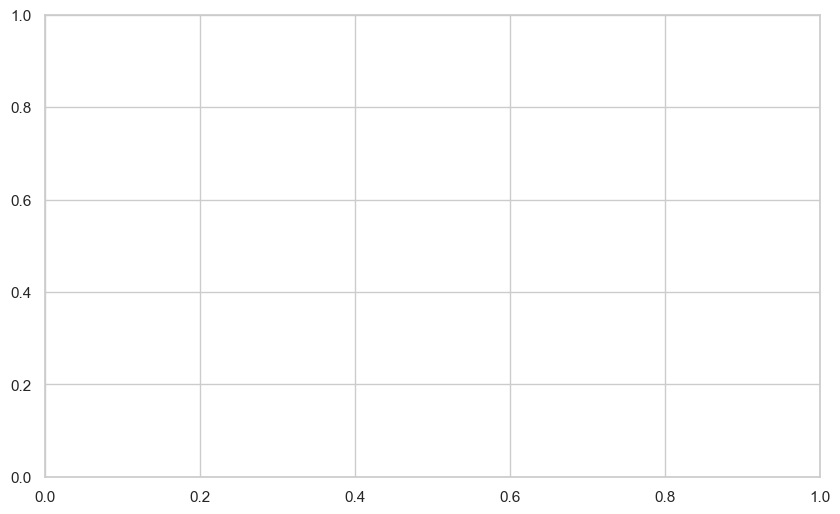

In [42]:


data=df_geo_gnm.filter(variable=['Resources|Nitrogen*'],)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

data.plot.stack(title='Nitrogen test', 
                ax=ax, 
                alpha=0.8, 
                cmap='tab20',
                total=True)

ax.legend( loc='lower center', bbox_to_anchor=(0.5, -0.45), ncols=2)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_xlim(2010, 2050)
plt.tight_layout()


# plt.savefig(f"